## Blood fat
- 실습의 목표: 입력인 나이와 몸무게를 알려주면, 주어진 데이터 기준의 Blood fat을 얻는것.
- 즉, 40살 100키로인 사람의 데이터 기준 blood fat은? 하고 물어보면, 얼마입니다~~하고 답이 나와야함.
- Linear Regression

### 데이터 읽기

In [4]:
import numpy as np

raw_data = np.genfromtxt('../../data/practice/x09.txt', skip_header= 36)
raw_data
#1은 구분선 같은거고 맨앞이 인덱스, 뒤에 3개가 실제 데이터부분
#skip_header 옵션은 numpy의 genfromtxt 함수에서 사용되는 매개변수 중 하나로, 파일을 읽어올 때 상단에 있는 몇 줄의 데이터를 무시할지를 지정

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [5]:
raw_data.shape

(25, 5)

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

xs = np.array(raw_data[:,2], dtype = np.float32)
ys = np.array(raw_data[:,3], dtype = np.float32)
zs = np.array(raw_data[:,4], dtype = np.float32)

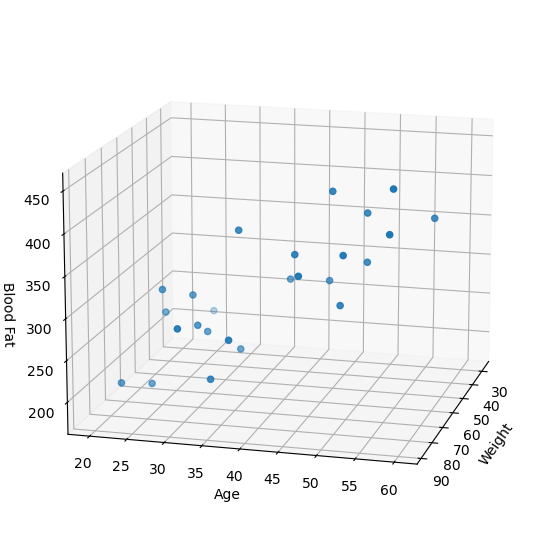

In [3]:
fig = plt.figure(figsize=(8,7))
ax = plt.subplot(111,projection = '3d')
ax.scatter(xs,ys,zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood Fat')
ax.view_init(15,15) #어느 각도에서 데이터를 볼건지 설정
plt.show()

- 뉴런 하나만 사용할 것.
- x1의 가중치, x2의 가중치, b값 이렇게 3개를 알아야함.
- 나는 $y = xW+b$ 라는 직선의 모델을 알아낼 것.
- 알아낸 후 모델(W,b)를 이용해서, 질문을 하는 것, 즉 age 40, weight 80인 사람의 bloodfat은 얼마? 하면 그 대답을 얻는 것이 방금 학습을 한 이유.
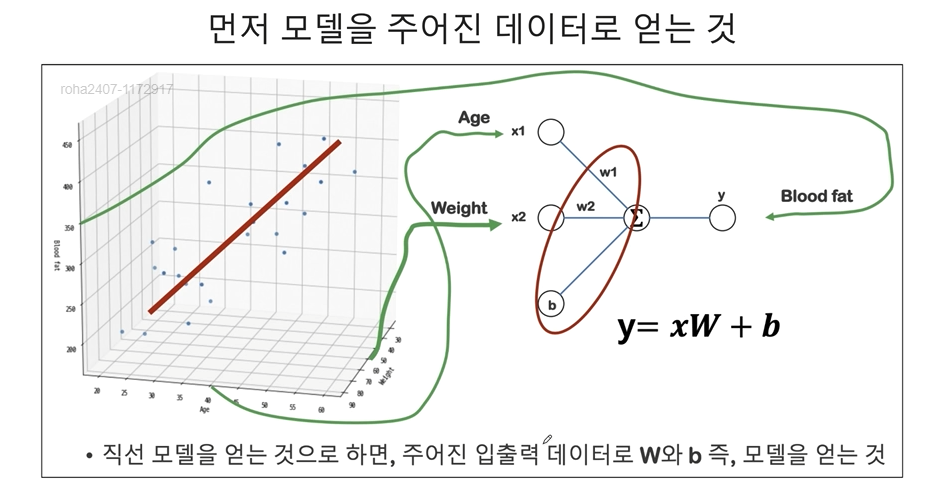

In [4]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)

In [5]:
y_data.shape

(25,)

- 여기서 x의 shape은 25x2, weight는 2x1이고 둘이 곱하면 25x1의 형태이다.
- 이때 y도 $xW+b$와 shape이 같아야 하므로 shape을 조정해준다.

In [6]:
y_data = y_data.reshape(25,1)
y_data.shape

(25, 1)

### 모델 만들기

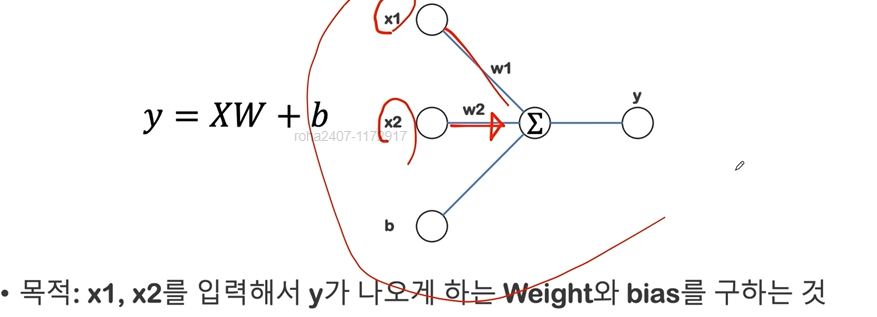

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape = (2,))
])

**loss?**
- 학습을 위해서는 loss(cost)함수를 정해주어야 한다.
- loss함수는 간략히 말해서, 정답까지 얼마나 멀리 있는지를 측정하는 함수이다.
- 이번에는 MSE를 사용
- 그리고 옵티마이저를 선정한다.
- 옵티마이저를 loss를 어떻게 줄일 것인지를 결정하는 방법을 선택하는 것이다.
- 여기에서는 rmsprop사용



In [8]:
model.compile(optimizer = 'rmsprop', loss = 'mse')

In [9]:
# model에 대한 설명
# output은 1개 찾아야할 param은 3개
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습 시작
- 학습시키는 명령어 fit

In [10]:
hist = model.fit(x_data, y_data, epochs = 5000)

Epoch 1/5000
1/1 [==============================] - 0s 225ms/step - loss: 66096.3359
Epoch 2/5000
1/1 [==============================] - 0s 3ms/step - loss: 65920.7734
Epoch 3/5000
1/1 [==============================] - 0s 4ms/step - loss: 65793.6328
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 65687.3281
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 65593.0547
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 65506.7500
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 65426.1367
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 65349.8008
Epoch 9/5000
1/1 [==============================] - 0s 4ms/step - loss: 65276.7969
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 65206.4531
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 65138.2812
Epoch 12/5000
1/1 [==============================] - 0s 2ms/step - loss: 65071.9102

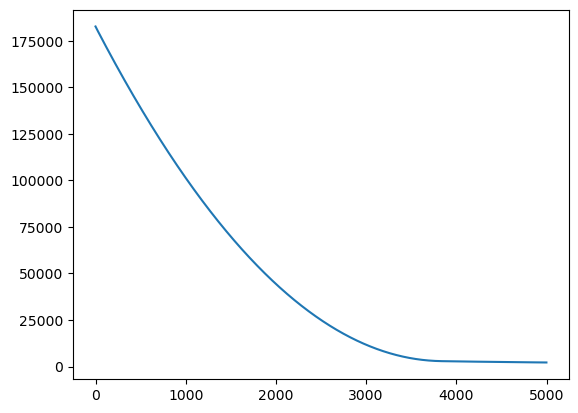

In [29]:
plt.plot(hist.history['loss'] )

### 예측
- 데이터를 이용해서 모델을 만들고 학습했으니 예측해보기-> 사용법은 sklearn과 비슷
- 몸무게 100에 44살 된 사람의 blood fat은?


In [33]:
model.predict(np.array([100,44]).reshape(1,2))

1/1 [==============================] - 0s 66ms/step


array([[391.69348]], dtype=float32)

In [34]:
model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 16ms/step


array([[231.18547]], dtype=float32)

In [36]:
# get weight함수를 이용하면 모델의 가중치와 bias 확인 가능
w_, b_ = model.get_weights()
w_,b_

(array([[2.036933],
        [4.159509]], dtype=float32),
 array([4.9817696], dtype=float32))

In [48]:
x = np.linspace(20,100,50).reshape(50,1)
y = np.linspace(10,70,50).reshape(50,1)

X = np.concatenate((x,y),axis = 1)
Z = np.matmul(X,w_) + b_

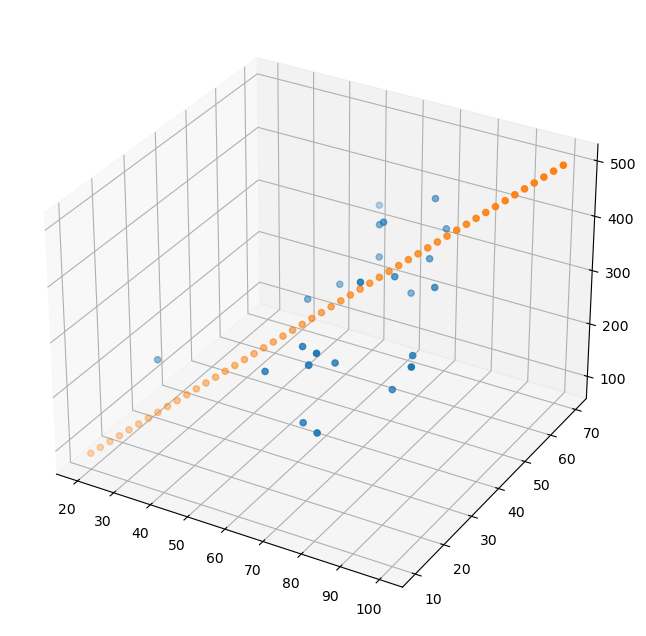

In [49]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111,projection = '3d')
ax.scatter(xs,ys,zs)
ax.scatter(x,y,Z)


## XOR - 이진데이터 사용
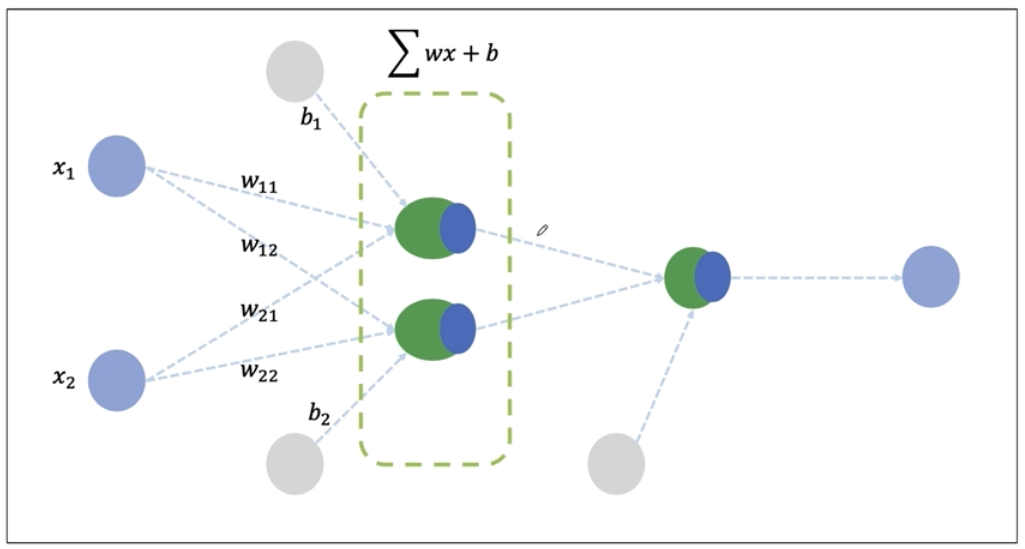


- 첫번째 레이어는 입력을 받아 2개의 뉴런을 가지는 출력으로 변환
- 두번째 레이어는 1개의 뉴런을 가지는 출력으로 변환
- 입력 레이어가 2개의 뉴런을 가지고 있는 이유는 XOR함수의 입력이 (0, 1), (1, 0), (0, 0), (1, 1)과 같은 형태로 2개의 이진값이기 때문

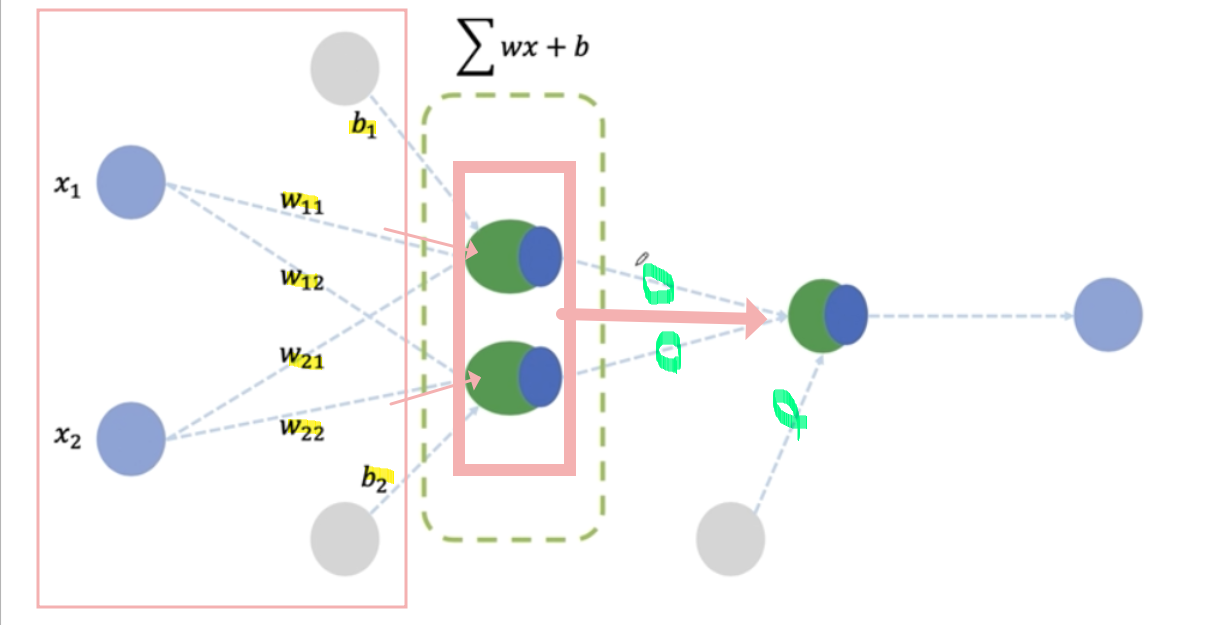

- 데이터 정의

In [50]:
X = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])

y = np.array([[0],[1],[1],[0]])


- 모델 작성

> - xor문제를 해결하려면 직선을2개 사용해야한다.
> - 이때, 이 2개를 합치려다보니 다시 직선의 형태가 되지 않도록하기 위해 activation function을 사용한다.

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation ='sigmoid',input_shape = (2,)),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

In [58]:
# tf.keras.optimizer.SGD: 전체 데이터를 보기엔 문제가 있으니 확률적으로 데이터를 샘플링 하라는 것

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1), loss = 'mse')

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
hist = model.fit(X,y, epochs = 5000, batch_size= 1)

Epoch 1/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2642
Epoch 2/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2634
Epoch 3/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2628
Epoch 4/5000
4/4 [==============================] - 0s 1000us/step - loss: 0.2620
Epoch 5/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2616
Epoch 6/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2612
Epoch 7/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2608
Epoch 8/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2604
Epoch 9/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2601
Epoch 10/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2598
Epoch 11/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2598
Epoch 12/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2596
Epoch 13/5000
4/4 [===========================

- 레이어가 2개 이상이 생기자 그 안의 오차를 어떻게 계산할 것인가에 대한 의문이 생김.
- 이에기반해 오차를 역으로 계산하자는 **오차역전파**의 개념이 생겨남

In [62]:
model.predict(X)
# 0 1 1 0으로 나옴

1/1 [==============================] - 0s 13ms/step


array([[0.05883045],
       [0.94366455],
       [0.9401035 ],
       [0.04718318]], dtype=float32)

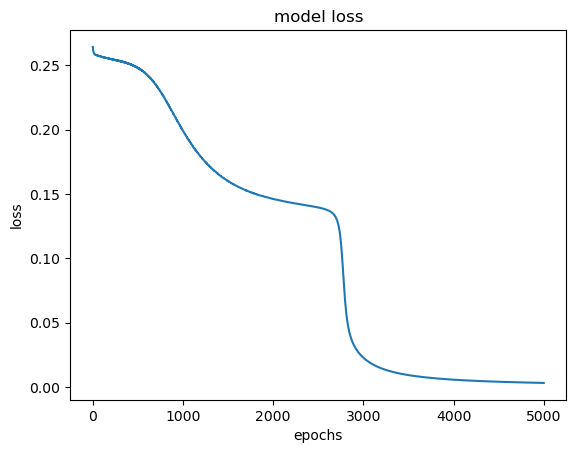

In [65]:
plt.plot(hist.history['loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title('model loss');

In [66]:
# 각 layer별의 가중치 확인하고 싶을 경우
for w in model.weights:
    print('---')
    print(w)

---
<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 4.250554 ,  6.843434 ],
       [-4.2463193, -5.7834573]], dtype=float32)>
---
<tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([-2.3333247,  2.8803666], dtype=float32)>
---
<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 7.6048822],
       [-6.914514 ]], dtype=float32)>
---
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([3.102389], dtype=float32)>


## XOR - iris(분류)

In [68]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [69]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- onehot encoding으로 데이터인코딩

In [71]:
from sklearn.preprocessing import OneHotEncoder

# 원핫인코딩은 기본적으로 대부분의 값이 0인 경우 메모리 절약을 위해 사용하는 희소행렬 형태
# 이때 sparse 를 False로 설정하면, 희소 행렬 대신 일반적인 밀집 행렬을 반환하게된다.
# 즉, 모든 데이터가 포함된 일반적인 2차원 데이터 배열을 반환한다.

# 원핫인코딩을 할때 새로운 데이터가 인코딩 시 사용된 범주에 없는 경우가 있을 수 있다.
# 이때 handle은 ignore로 설정하면 새로운 범주를 무시하고 인코딩 된 결과에서 해당 열(특성을) 0으로 채운다.
enc = OneHotEncoder(sparse = False, handle_unknown = 'ignore')


enc.fit(y.reshape(len(y),1))

c:\Users\bigdata\anaconda3\envs\ds_study\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [72]:
enc.categories_

[array([0, 1, 2])]

In [75]:
y_onehot = enc.transform(y.reshape(len(y),1))
y_onehot[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [76]:
from sklearn.model_selection import train_test_split

X_tr, X_t, y_tr, y_t = train_test_split(X, y_onehot, test_size = 0.2, random_state = 0xC0FFEE)

- 구성하고자 하는 net

4x32, 32x32, 32x32, 32x3

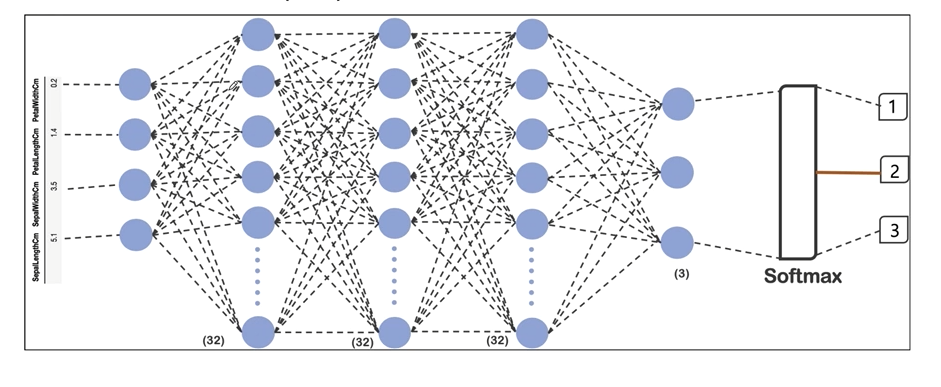

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_shape = (4,) ),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')

])

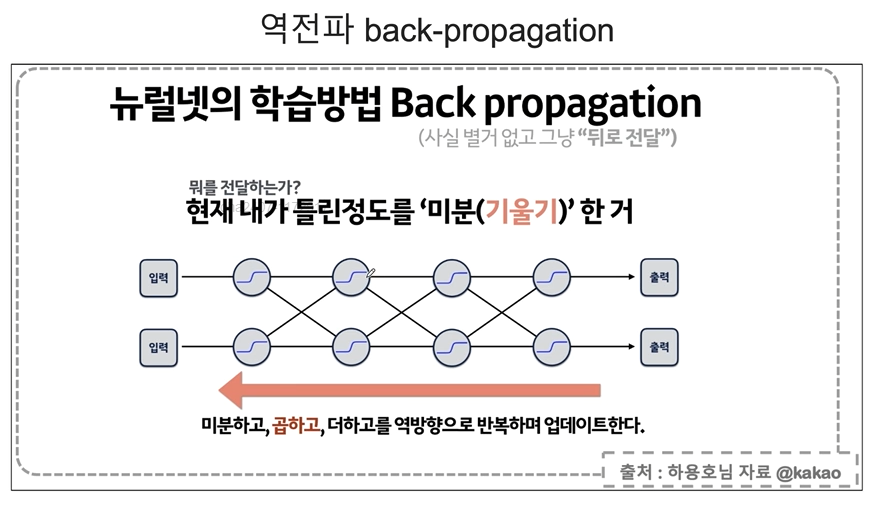

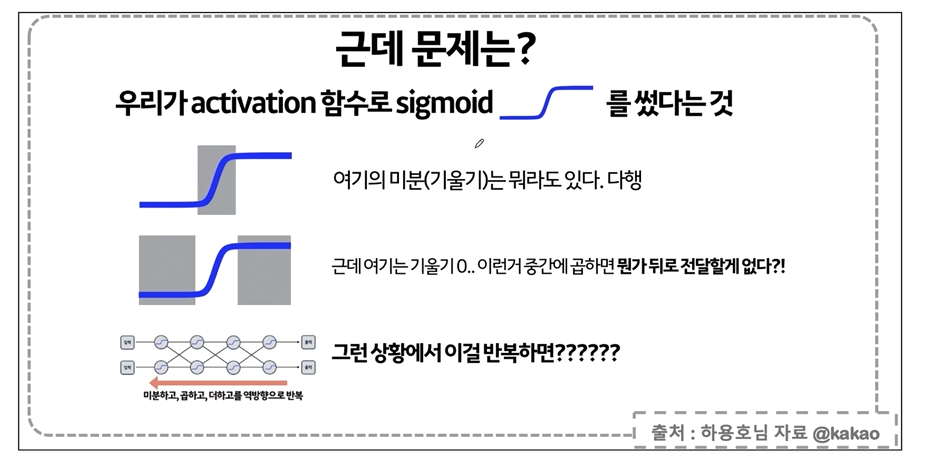

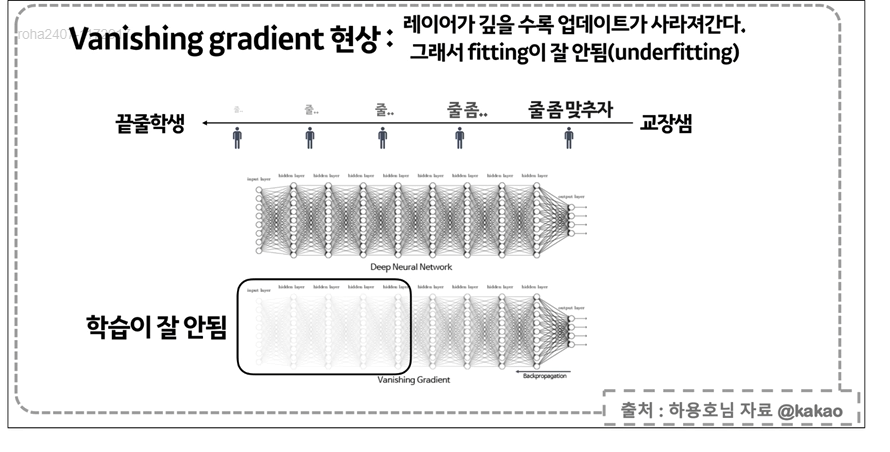

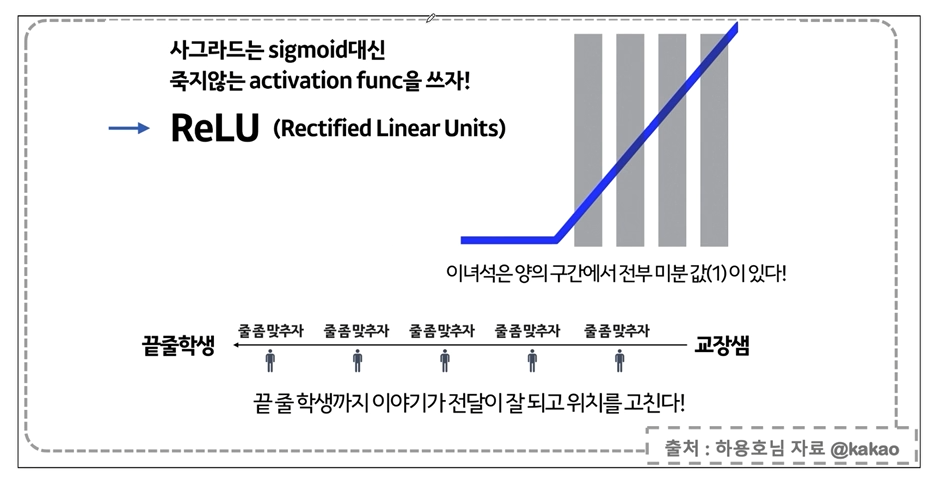

- 그래서 은닉층의 대부분은 activation function으로 RELU사용

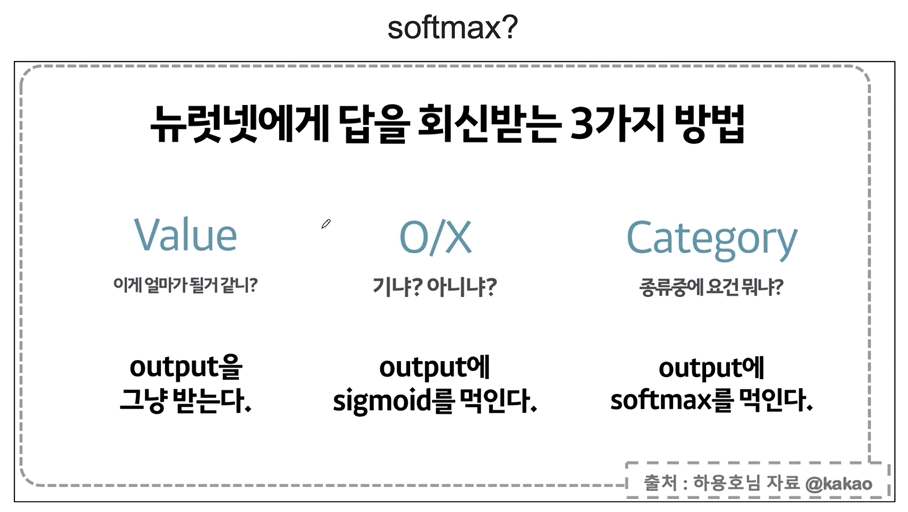

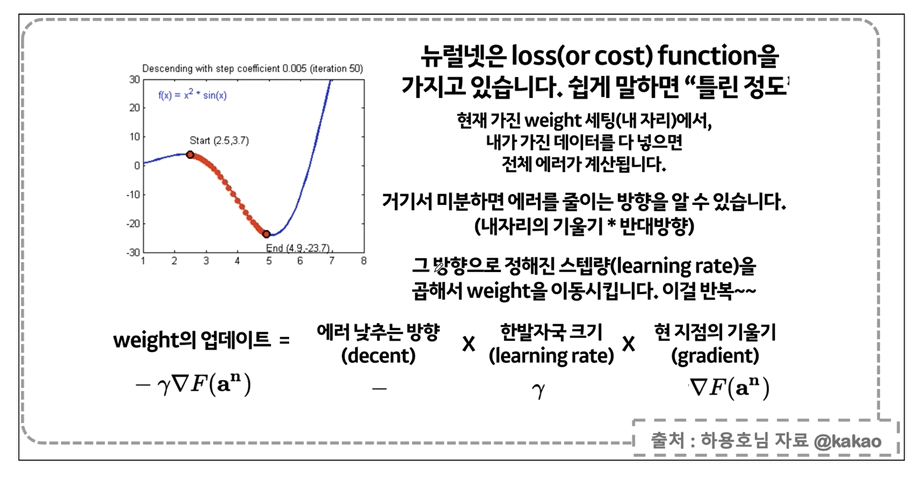

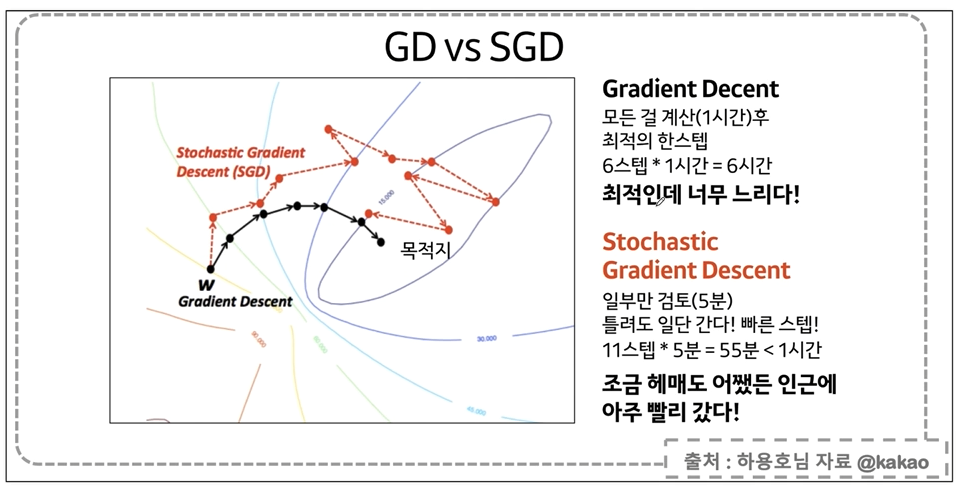

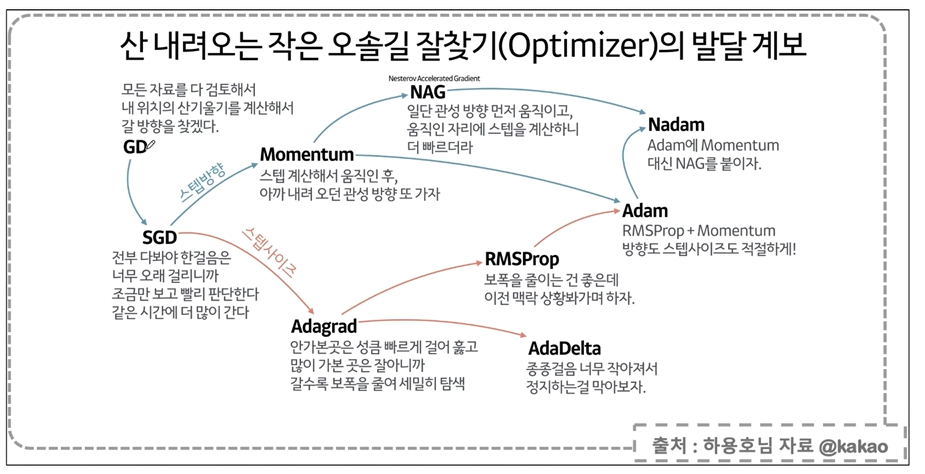

- 결론: data가 복잡할땐 adam을 사용하자!

In [80]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) #accuracy의 값도 얻고 싶을때 metrics매개변수 사용
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
hist = model.fit(X_tr, y_tr, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.8921 - accuracy: 0.3000
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 1.4628 - accuracy: 0.3000
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1983 - accuracy: 0.3000
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0741 - accuracy: 0.4250
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0374 - accuracy: 0.3667
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0343 - accuracy: 0.4000
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0251 - accuracy: 0.4667
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0106 - accuracy: 0.4583
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9920 - accuracy: 0.3583
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9696 - accuracy: 0.3417
Epoch 11/100
4/4 [===========

In [82]:
model.evaluate(X_t, y_t, verbose = 2)

1/1 - 0s - loss: 0.0860 - accuracy: 0.9667 - 128ms/epoch - 128ms/step


[0.08602992445230484, 0.9666666388511658]

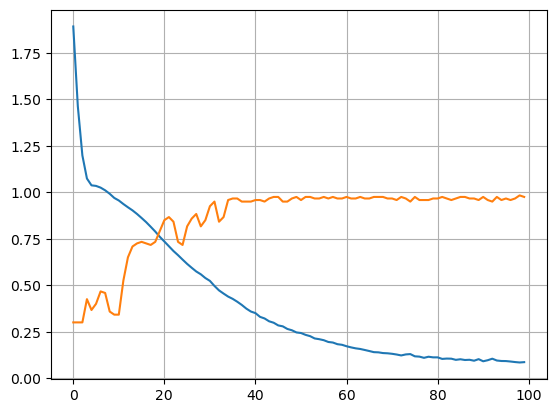

: 

In [85]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.grid()

## MNIST
### 필기체 data

In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_tr, y_tr), (x_t, y_t) = mnist.load_data()
# 픽셀 값이 255 여서 255로 나눠준것. 마치 min max scaler 를 사용한것과 비슷
x_tr,x_t = x_tr/255, x_t/255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [50]:
x_tr[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

- 이때 원핫인코딩을 해줘야 한다.
- 하지만 또 하나의 방법이 loss 함수를 sparse_categorical_crossentropy로 설정하면 같은 효과가 난다.

- 이번 모델

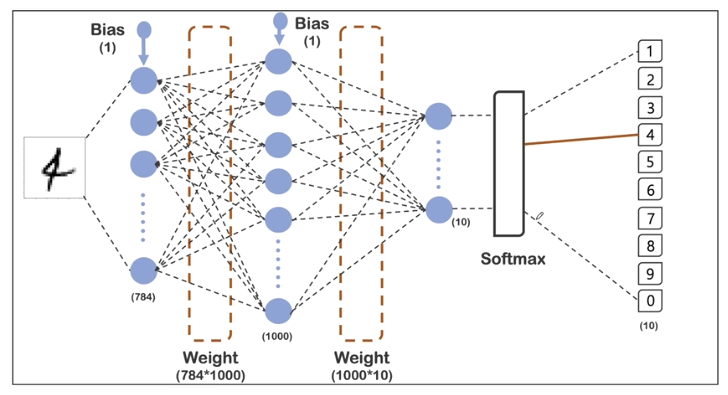

In [6]:
model = tf.keras.models.Sequential([
    #flatten = 1열로 펼쳐줌
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

c:\Users\roha2\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
%%time

hist = model.fit(x_tr, y_tr, validation_data=(x_t,y_t),epochs = 10 , batch_size= 100, verbose = 1 )


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9979 - loss: 0.0076 - val_accuracy: 0.9813 - val_loss: 0.0712
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9963 - loss: 0.0108 - val_accuracy: 0.9819 - val_loss: 0.0679
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9822 - val_loss: 0.0749
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9798 - val_loss: 0.0852
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9985 - loss: 0.0054 - val_accuracy: 0.9828 - val_loss: 0.0724
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 0.9783 - val_loss: 0.0946
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9975 - loss: 0.0073 - val_accuracy: 0.9810 - val_loss: 0.0898
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9980 - loss: 0.0069 - val_accu

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

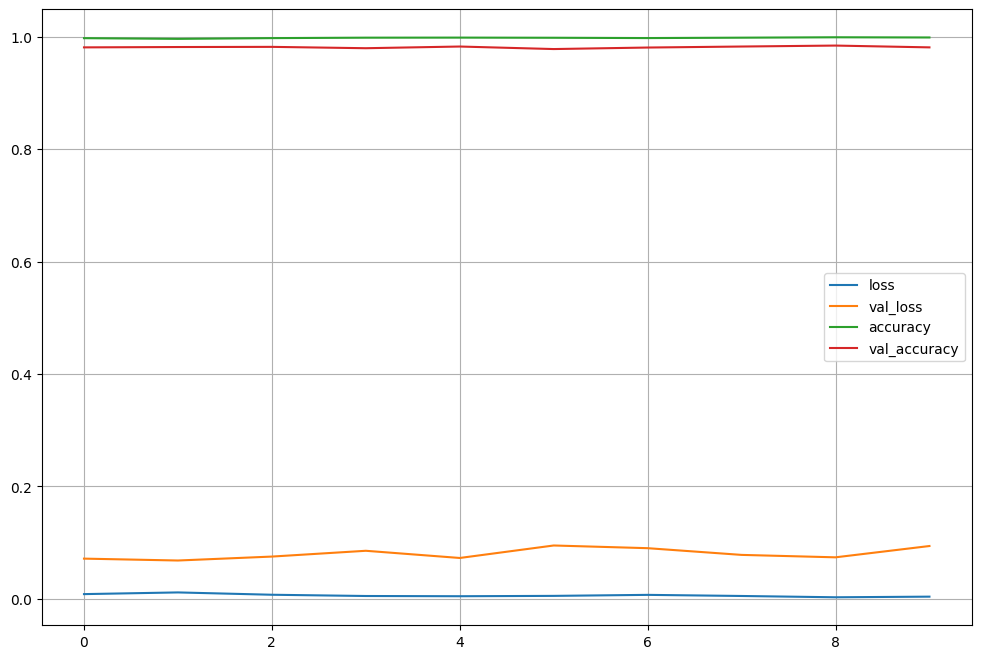

In [49]:
plot_target = ['loss','val_loss','accuracy','val_accuracy']

plt.figure(figsize = (12,8))
for target in plot_target:
    plt.plot(hist.history[target], label = target)

plt.legend()
plt.grid()
plt.show();

In [20]:
score = model.evaluate(x_t,y_t)
score

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9780 - loss: 0.1138


[0.09367628395557404, 0.9812999963760376]

In [25]:
import numpy as np
pred = model.predict(x_t)
pred_labels = np.argmax(pred, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


- 앞의 10개 데이터가 다 맞은 걸 확인할 수 있음

In [26]:
pred_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [28]:
y_t[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

- 틀린 데이터 확인

In [63]:
wrong_results = []

for n in range(0, len(pred_labels)):
    if pred_labels[n]!= y_t[n]:
        wrong_results.append((n))

len(wrong_results)

187

In [64]:
import random 

samples = random.choices(population = wrong_results, k = 16)


In [65]:
samples

[4880,
 951,
 3503,
 9749,
 1156,
 3475,
 1522,
 613,
 4100,
 2024,
 6597,
 720,
 3976,
 4199,
 3405,
 2280]

In [66]:
x_t.shape

(10000, 28, 28)

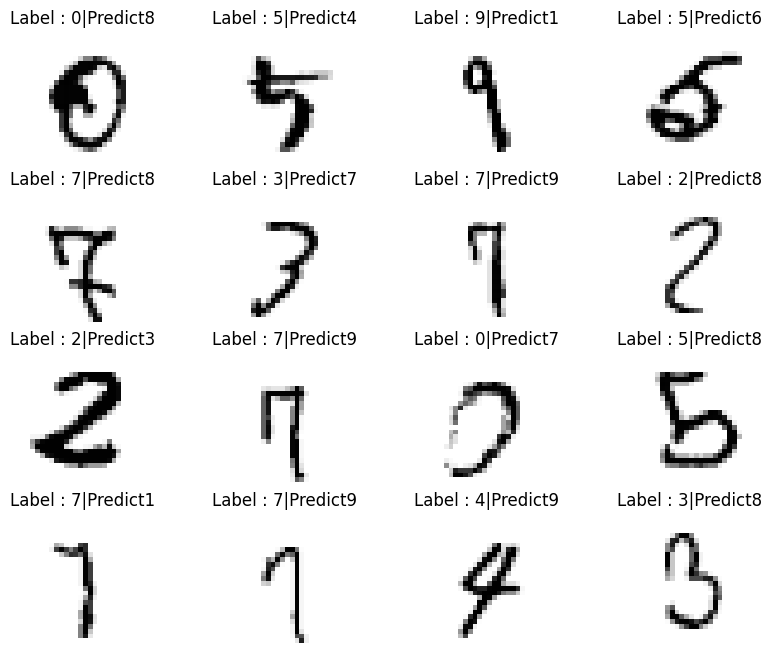

In [68]:
plt.figure(figsize = (10,8))

for idx, n in enumerate(samples):
    plt.subplot(4,4, idx +1)
    plt.imshow(x_t[n].reshape(28,28), cmap = 'Greys')
    plt.title('Label : ' + str(y_t[n]) + '|Predict' + str(pred_labels[n]))
    plt.axis('off')
    
plt.show()

### fashion data

In [69]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_tr,y_tr), (x_t,y_t) = fashion_mnist.load_data()
x_tr, x_t = x_tr/255, x_t/255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


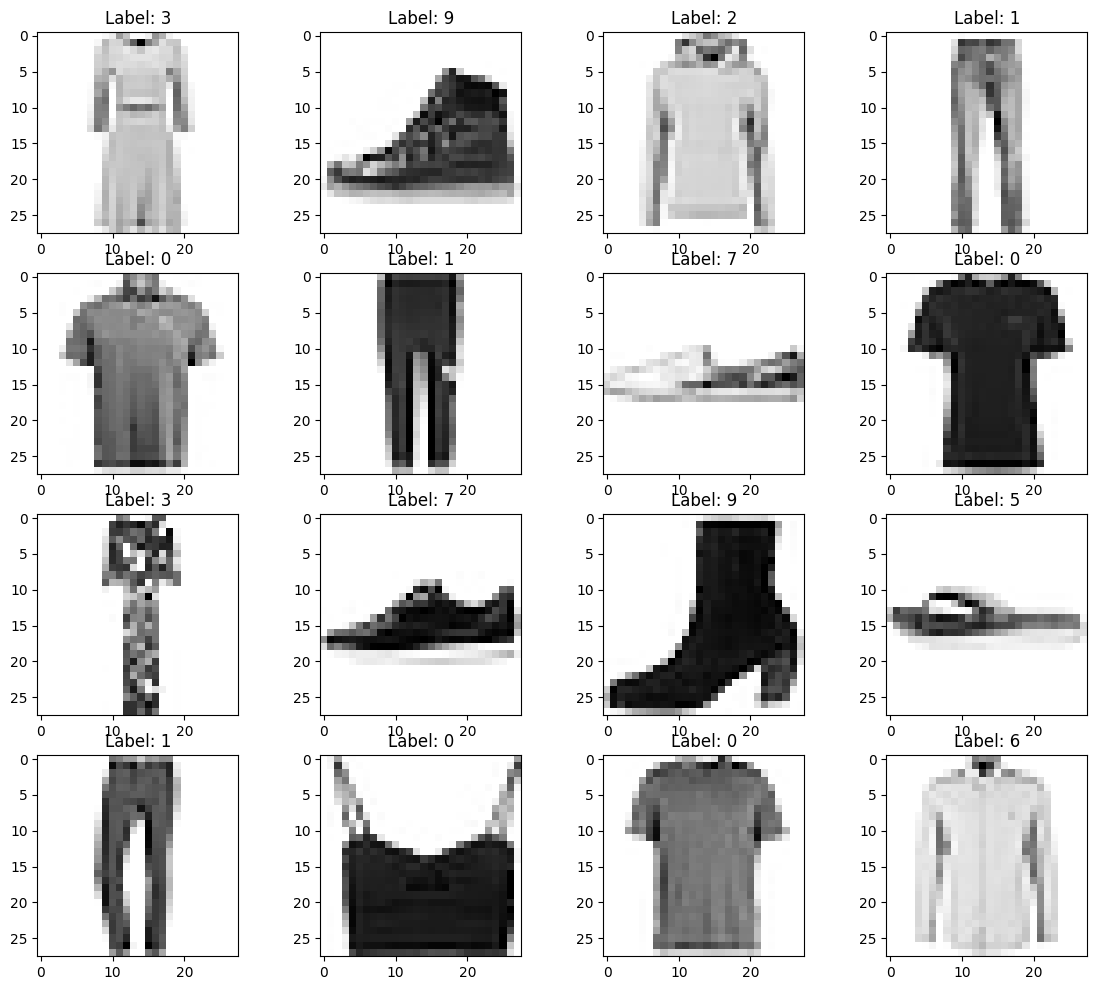

In [75]:
samples = random.sample(population = range(0,len(y_tr)), k = 16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4, idx+1)
    plt.imshow(x_tr[n].reshape(28,28),cmap = 'Greys')
    plt.title('Label: '+ str(y_tr[n]))

plt.show()

In [76]:
model = tf.keras.models.Sequential([
    #flatten = 1열로 펼쳐줌
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

c:\Users\roha2\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])


In [83]:
hist = model.fit(x_tr, y_tr, validation_data=(x_t,y_t),epochs = 10 , batch_size= 100, verbose = 1 )

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9195 - loss: 0.2162 - val_accuracy: 0.8898 - val_loss: 0.3258
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9257 - loss: 0.1989 - val_accuracy: 0.8873 - val_loss: 0.3306
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9287 - loss: 0.1906 - val_accuracy: 0.8920 - val_loss: 0.3337
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9292 - loss: 0.1906 - val_accuracy: 0.8928 - val_loss: 0.3215
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9358 - loss: 0.1781 - val_accuracy: 0.8943 - val_loss: 0.3193
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9362 - loss: 0.1715 - val_accuracy: 0.8912 - val_loss: 0.3274
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9396 - loss: 0.1613 - val_accuracy: 0.8830 - val_loss: 0.3611
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9375 - loss: 0.1659 - val_

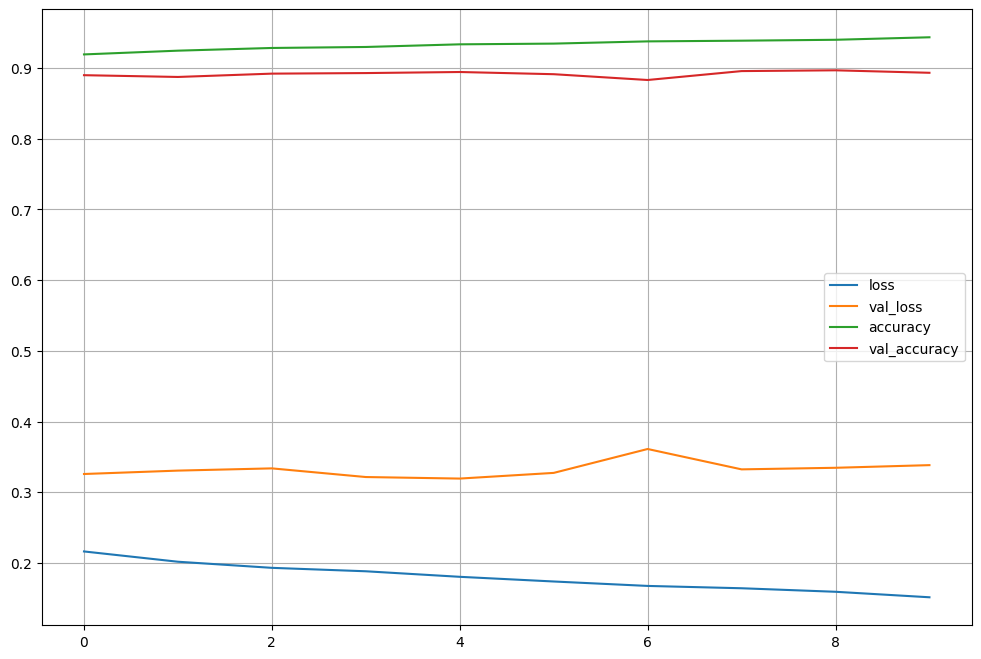

In [84]:
plot_target = ['loss','val_loss','accuracy','val_accuracy']

plt.figure(figsize = (12,8))
for target in plot_target:
    plt.plot(hist.history[target], label = target)

plt.legend()
plt.grid()
plt.show();

In [85]:
score = model.evaluate(x_t,y_t)
score

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8926 - loss: 0.3468


[0.33832573890686035, 0.8931999802589417]

## CNN
- 사진에서 특징을 검출해내는 layer를 가짐

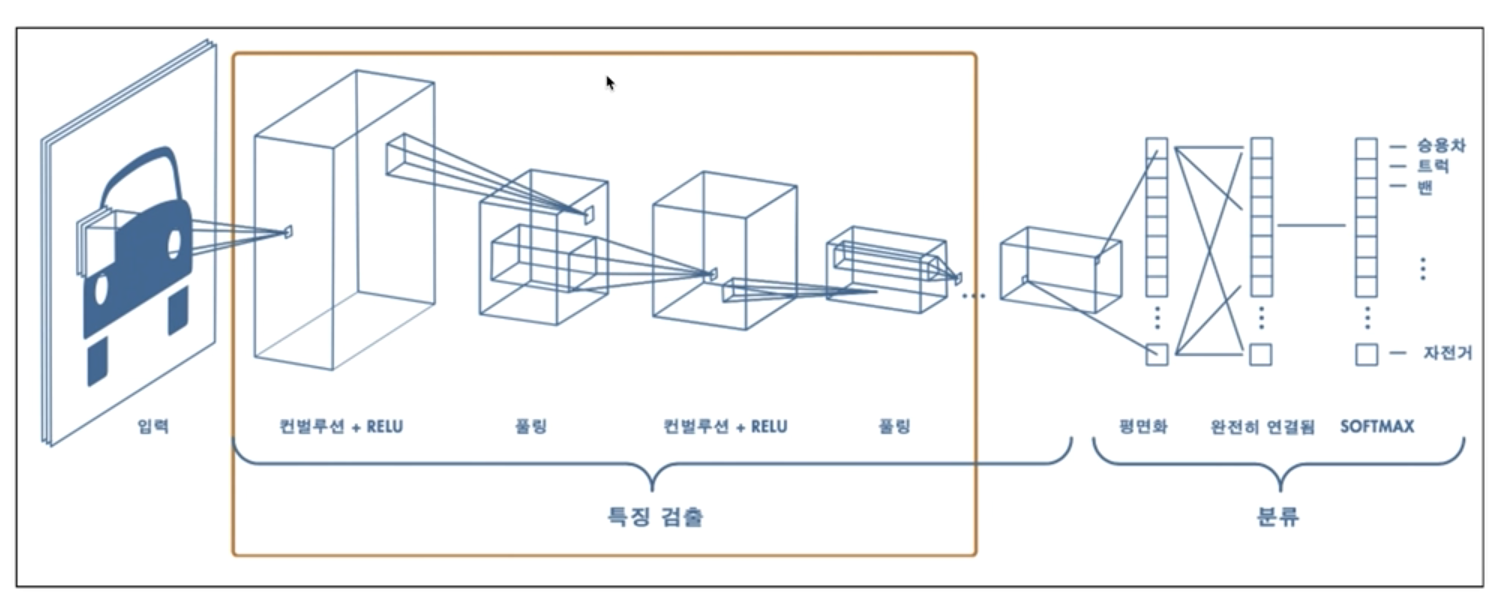

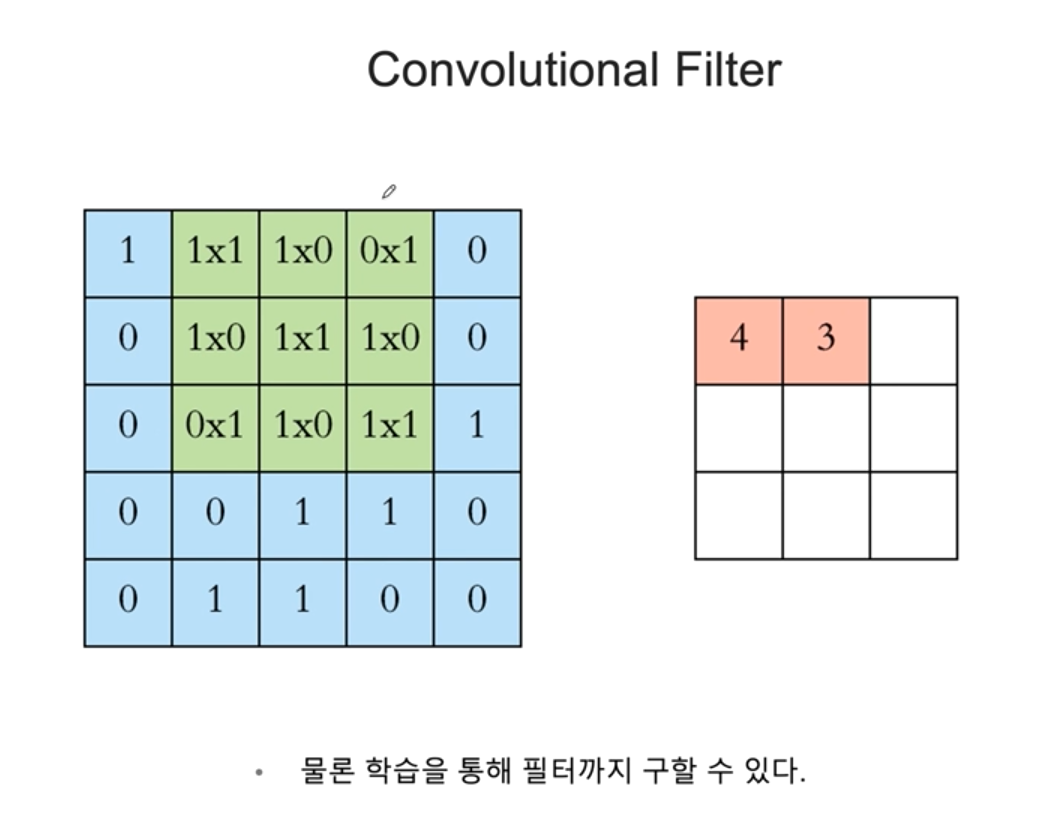

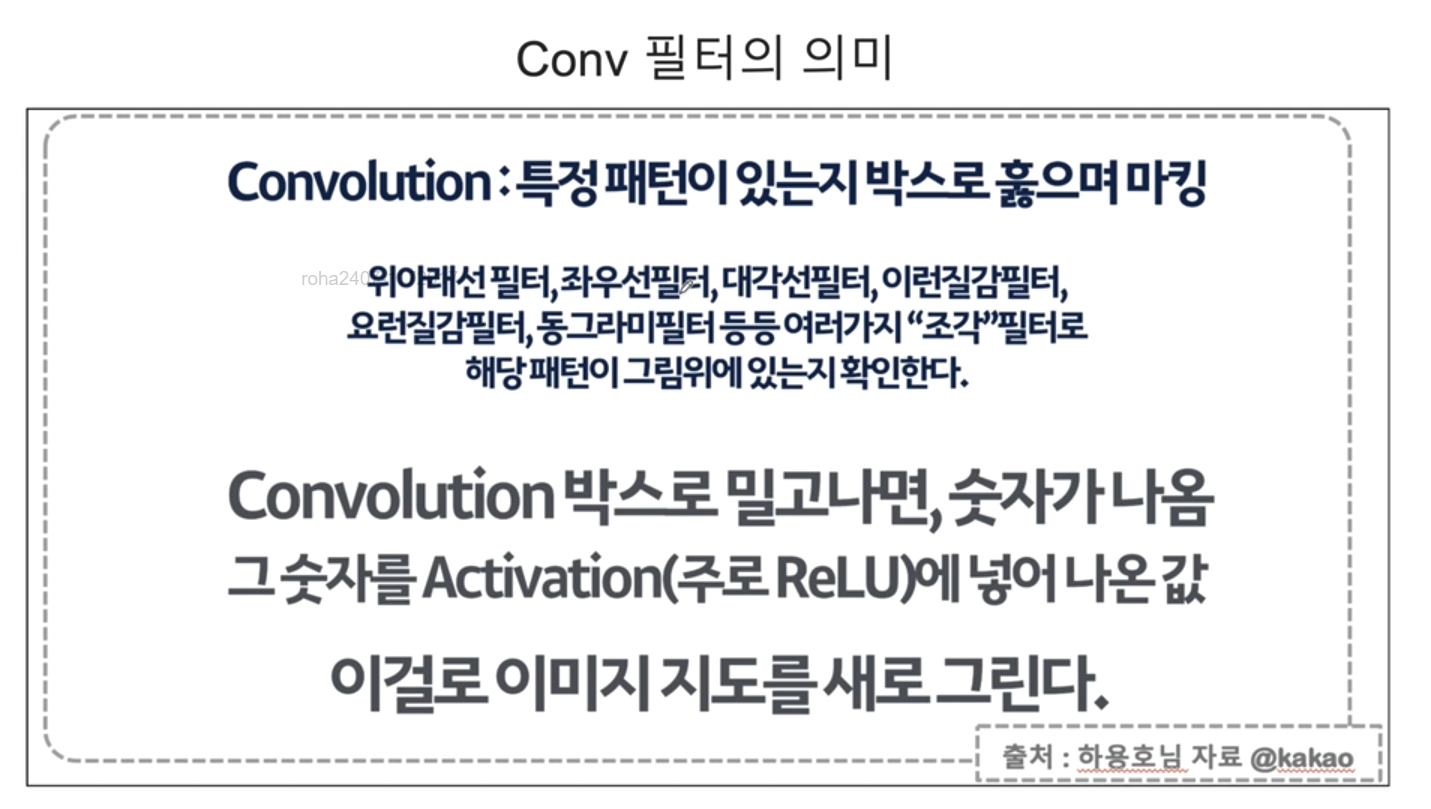

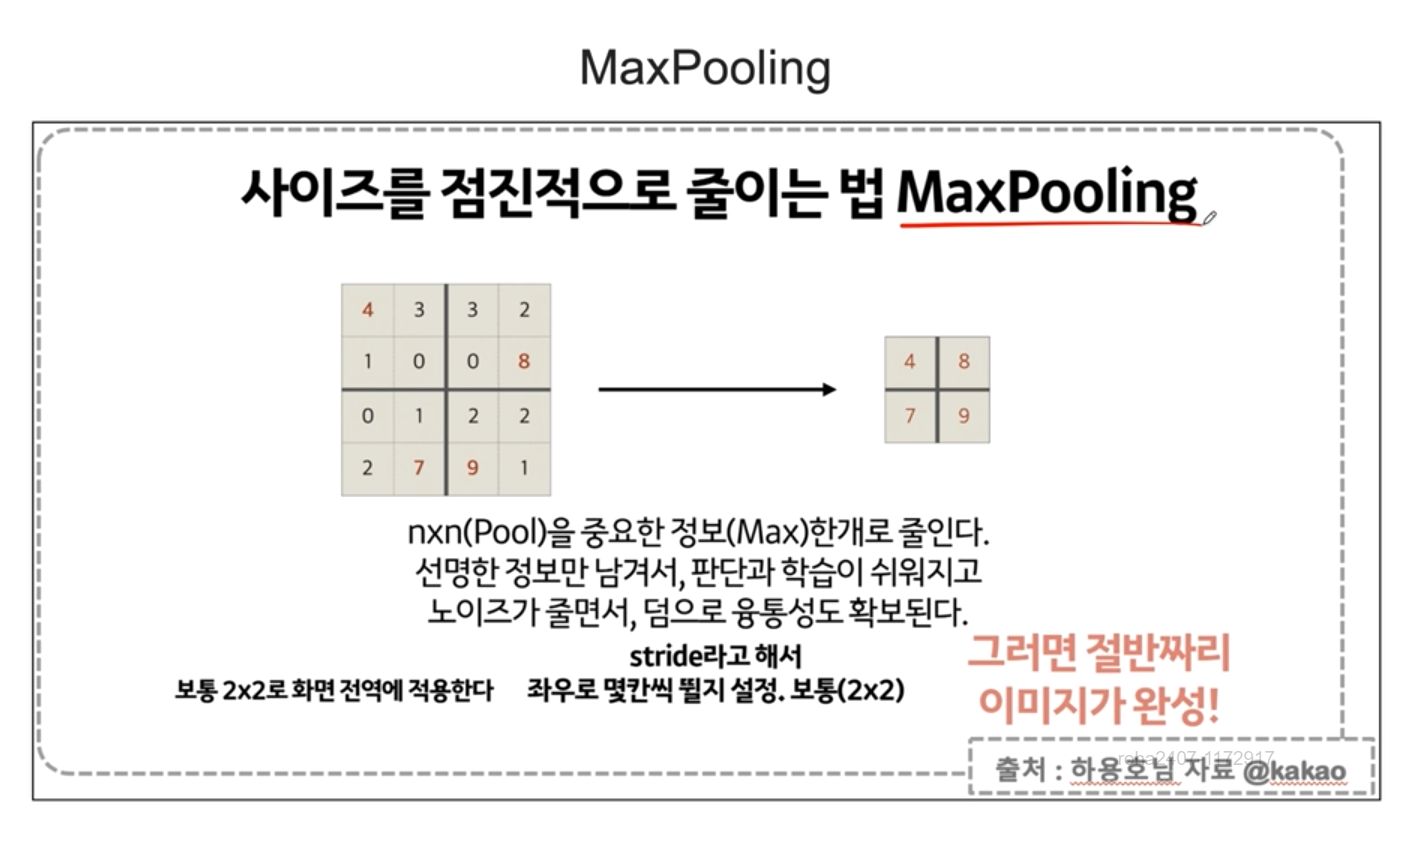

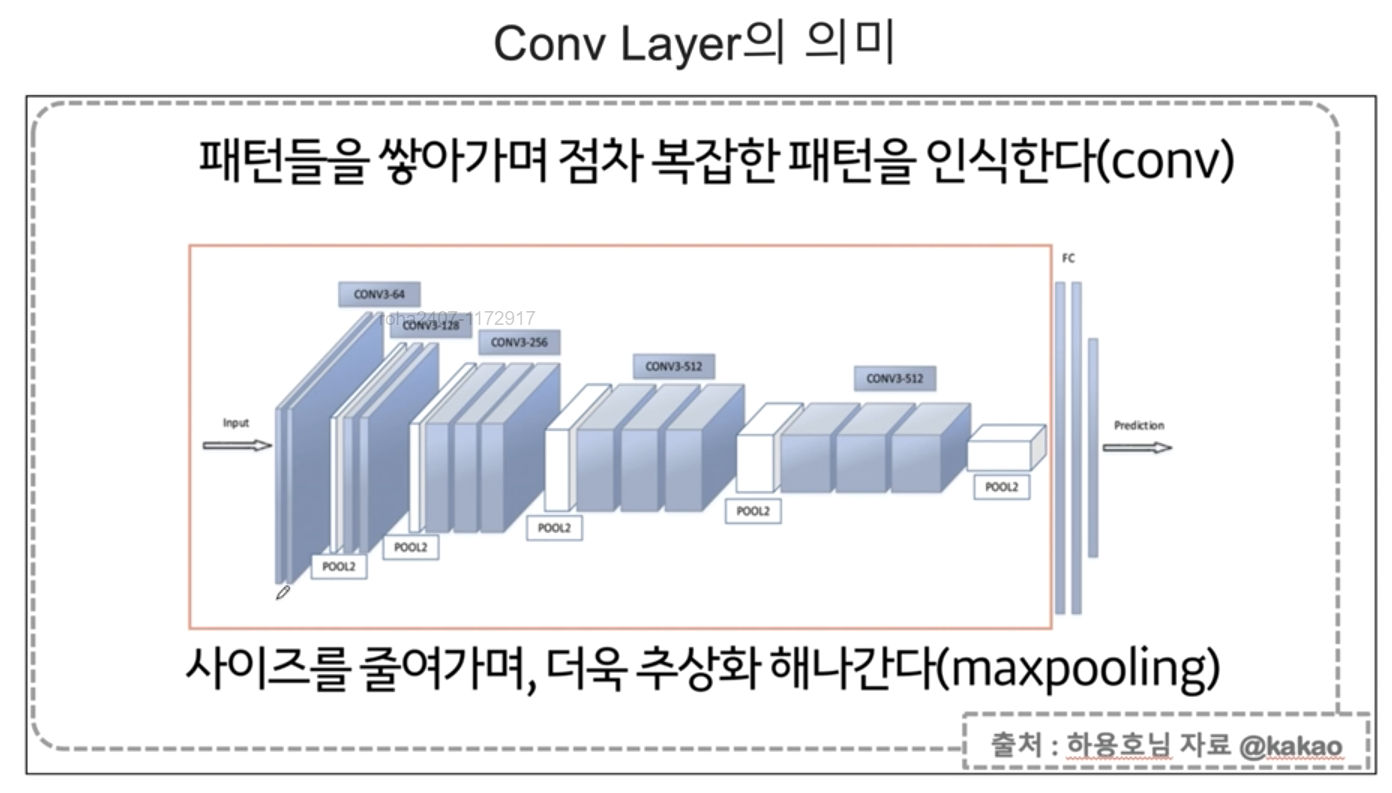

- 귀퉁이의 이미지가 짤리지 않도록 모서리에 0을 넣어줌-> zero padding
- 코드 옵션으로는 padding = 'same'

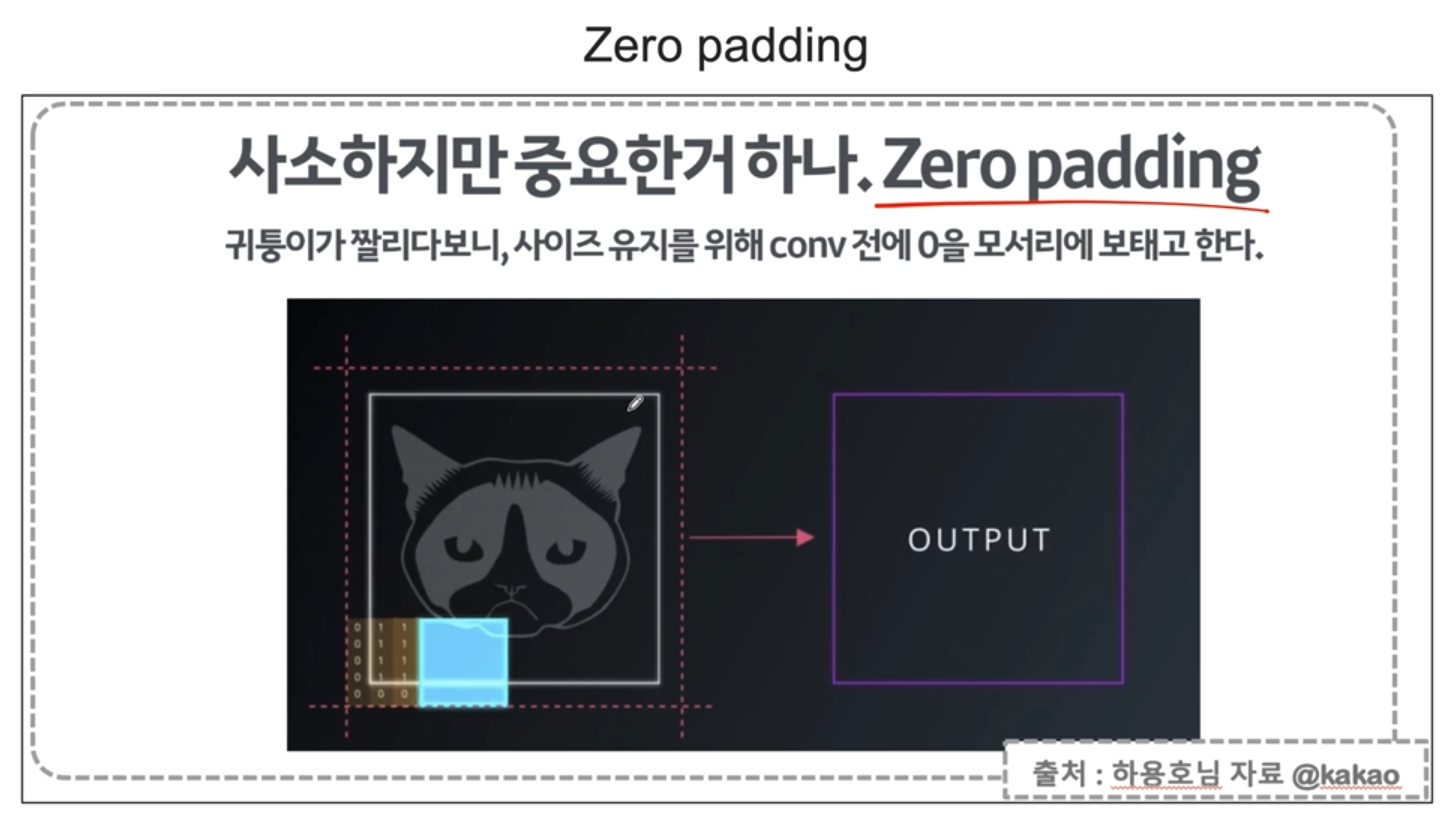

In [90]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_tr,y_tr), (x_t,y_t) = mnist.load_data()
x_tr, x_t = x_tr/255, x_t/255

x_tr = x_tr.reshape((60000,28,28,1))
x_t = x_t.reshape((10000,28,28,1))

In [98]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size = (5,5),strides = (1,1), padding = 'same', activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPool2D(pool_size = (2,2), strides = (2,2)), 
    layers.Conv2D(64, (2,2), padding = 'same', activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2), strides = (2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [99]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1000)           │     3,137,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,156,098 (12.04 MB)

 Trainable params: 3,156,098 (12.04 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
%%time

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 5.44 ms


In [102]:
hist = model.fit(x_tr,y_tr, epochs = 5, verbose = 1,validation_data=(x_t, y_t))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9212 - loss: 0.2474 - val_accuracy: 0.9882 - val_loss: 0.0370
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9849 - loss: 0.0461 - val_accuracy: 0.9894 - val_loss: 0.0298
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9900 - loss: 0.0300 - val_accuracy: 0.9922 - val_loss: 0.0230
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9926 - loss: 0.0224 - val_accuracy: 0.9900 - val_loss: 0.0326
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9942 - loss: 0.0166 - val_accuracy: 0.9921 - val_loss: 0.0229


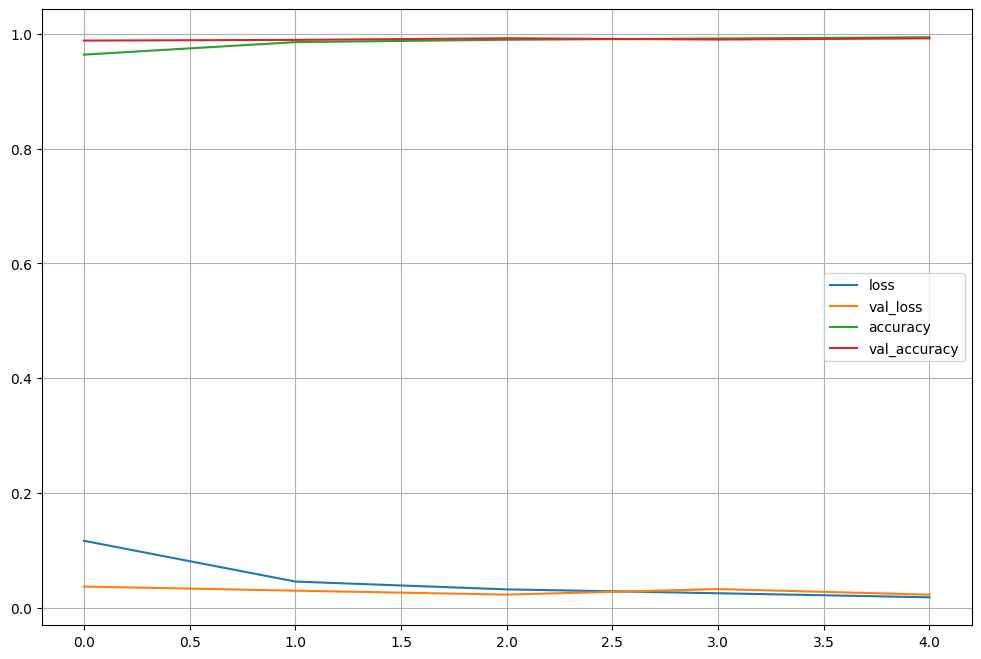

In [105]:
plot_target = ['loss','val_loss','accuracy','val_accuracy']

plt.figure(figsize = (12,8))
for target in plot_target:
    plt.plot(hist.history[target], label = target)

plt.legend()
plt.grid()
plt.show();

In [107]:
import numpy as np
pred = model.predict(x_t)
pred_labels = np.argmax(pred, axis = 1)
pred_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [108]:
wrong_results = []

for n in range(0, len(y_t)):
    if pred_labels[n]!= y_t[n]:
        wrong_results.append((n))

len(wrong_results)

79

In [109]:
import random

samples = random.choices(population = wrong_results, k=16)

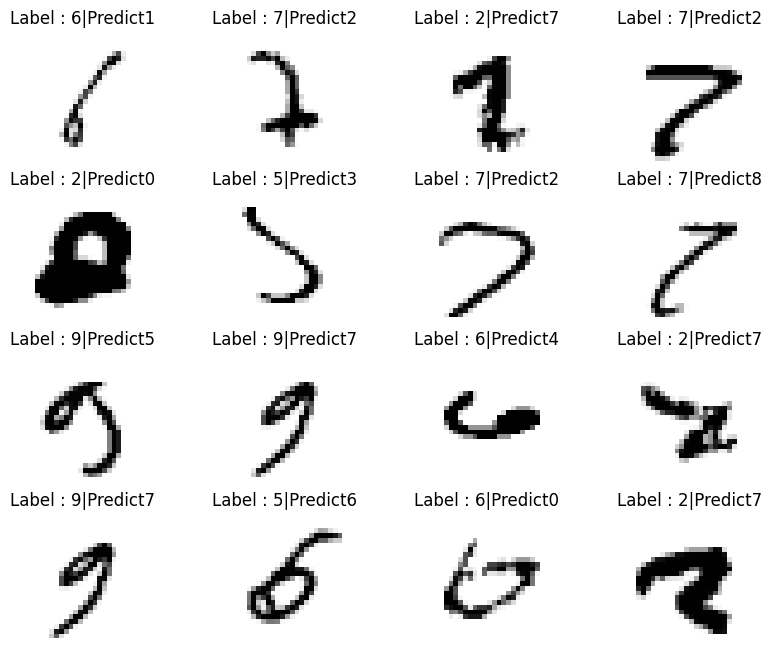

In [110]:
plt.figure(figsize = (10,8))

for idx, n in enumerate(samples):
    plt.subplot(4,4, idx +1)
    plt.imshow(x_t[n].reshape(28,28), cmap = 'Greys')
    plt.title('Label : ' + str(y_t[n]) + '|Predict' + str(pred_labels[n]))
    plt.axis('off')
    
plt.show()

In [111]:
scores = model.evaluate(x_t, y_t)
scores

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9895 - loss: 0.0285


[0.02289590612053871, 0.9921000003814697]

#### 모델저장


In [112]:
model.save('MNIST_CNN_model.h5')